# Gradient Descent

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. This method takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point. It's widely used in machine learning and deep learning for minimizing loss functions, such as in training neural networks.

In this notebook, we will:
1. Explain the mathematics behind the gradient descent method.
2. Demonstrate gradient descent with Python for both single-variable and multi-variable functions.
3. Visualize the steps (or "walks") the algorithm takes towards the minima.

By the end of this tutorial, you should have a solid understanding of how gradient descent works and how to implement it to solve optimization problems.

#### Mathematical Background of Gradient Descent

The key formula for the gradient descent method is:

$$
x_{n+1} = x_n - \gamma \nabla F(x_n)
$$

Where:
- $x_n$ is the current point.
- $\gamma$ is the learning rate, a scalar determining the step size at each iteration.
- $\nabla F(x_n)$ is the gradient of the function $F$ at the current point $x_n$.

The gradient, $\nabla F(x)$, of a function gives the direction of steepest ascent. By moving in the opposite direction, we attempt to find the local minimum.

The steps involved in the method are:
1. Initialize the variable(s) at some value.
2. Compute the gradient of the function at this point.
3. Update the variable(s) by moving in the opposite direction of the gradient.
4. Repeat steps 2 and 3 until convergence or the maximum number of iterations is reached.

This process effectively "descends" down the slope of the function until a minimum (or until it no longer makes significant progress, indicating a potential minimum).


#### Python Implementation: Single Variable Function

We will start with a simple single-variable quadratic function:
$$ F(x) = x^2 $$

The gradient (derivative) of this function is:
$$ \nabla F(x) = 2x $$

We'll implement the gradient descent to find the minimum of this function, starting from an initial point, and plot the steps taken.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create our Single Variable Gradient Descent Function
def gradient_descent_single_var(initial_x, learning_rate, n_iterations):
    x = initial_x
    x_history = [x]
    
    for i in range(n_iterations):
        gradient = 2 * x  # Derivative of x^2
        x = x - learning_rate * gradient
        x_history.append(x)
        
    return x_history

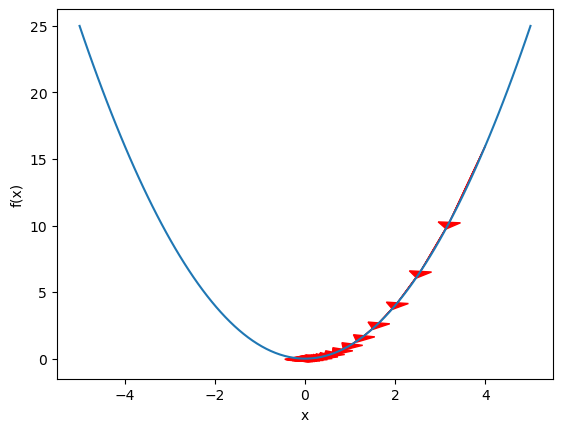

In [11]:
#plot the function and the gradient descent optimization on top of it and show an arrow on the optimization path
def plot_gradient_descent_single_var(x_history):
    x = np.linspace(-5, 5, 100)
    y = x**2
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    
    for i in range(1, len(x_history)):
        plt.arrow(x_history[i-1], x_history[i-1]**2, x_history[i] - x_history[i-1], x_history[i]**2 - x_history[i-1]**2, head_width=0.5, head_length=0.5, fc='r', ec='r')
    
    plt.show()

# Run the gradient descent function and plot the results
x_history = gradient_descent_single_var(initial_x=4, learning_rate=0.1, n_iterations=20)
plot_gradient_descent_single_var(x_history)



## Python Implementation: Multi Variable Function

We will now optimize a simple saddle point function:
$$ F(x_0, x_1) = x_0^2 - x_1^2 $$

The gradients for each variable are:
$$ \frac{\partial F}{\partial x_0} = 2x_0 $$
$$ \frac{\partial F}{\partial x_1} = -2x_1 $$

This function is interesting for visualization because it has a saddle point at $(0, 0)$. We'll implement gradient descent starting from an initial point and use a 3D plot to visualize the path taken by the algorithm.

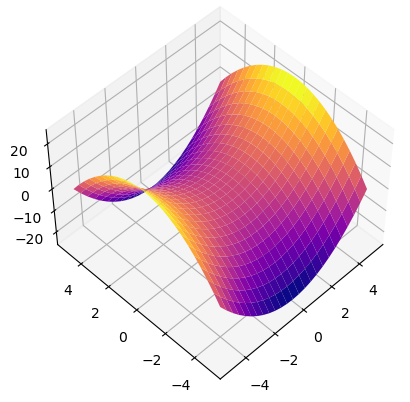

In [77]:
from mpl_toolkits.mplot3d import Axes3D

# Function definition
def f(x_0, x_1):
    return x_0**2 - x_1**2

#PLot the original function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5, 5, 25)
y = np.linspace(-5, 5, 25)
x, y = np.meshgrid(x, y)
z = f(x, y)

ax.plot_surface(x, y, z, cmap='plasma')
ax.view_init(50, 225)  # Adjust viewing angle for optimal visualization
plt.show()

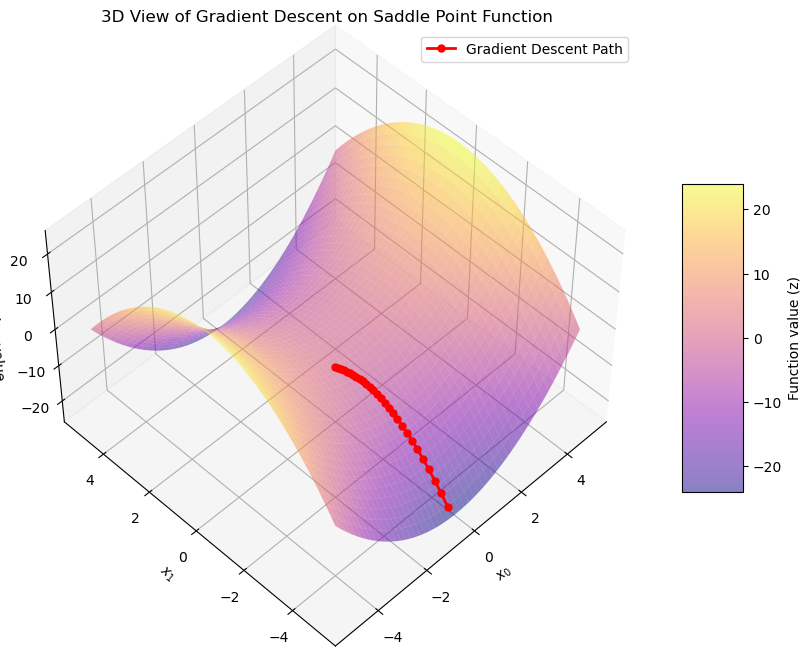

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function definition
def f(x_0, x_1):
    return x_0**2 - x_1**2

# Gradient descent function
def gradient_descent_saddle_point(initial_point, learning_rate, n_iterations):
    x_0, x_1 = initial_point
    history = [(x_0, x_1)]
    
    try:
        for i in range(n_iterations):
            grad_x_0 = 2 * x_0
            grad_x_1 = -2 * x_1
            x_0 -= learning_rate * grad_x_0
            x_1 -= learning_rate * grad_x_1
            history.append((x_0, x_1))
    except Exception as e:
        print(f"An error occurred: {e}")
    
    return history

# Parameters for the gradient descent
initial_point = (-1, -1)  # Start near the saddle to visualize descent behavior
learning_rate = 0.03
n_iterations = 27

# Run gradient descent
history = gradient_descent_saddle_point(initial_point, learning_rate, n_iterations)

# Unpacking history
x_0_values, x_1_values = zip(*history)
z_values = [f(x_0, x_1) for x_0, x_1 in zip(x_0_values, x_1_values)]

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Generate mesh grid for surface plot
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap='plasma', alpha=0.5)
# Plot the gradient descent path
path = ax.plot(x_0_values, x_1_values, z_values, label='Gradient Descent Path', color='r', marker='o', markersize=5, linewidth=2, zorder=5)
ax.set_xlabel('$x_0$')
ax.set_ylabel('$x_1$')
ax.set_zlabel('Function value')
ax.set_title('3D View of Gradient Descent on Saddle Point Function')
ax.view_init(50, 225)  # Adjust viewing angle for optimal visualization (matching previous graph)

# Adding a color bar which maps values to colors
color_bar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
color_bar.set_label('Function value (z)')

plt.legend()
plt.show()

## Conclusion

We can clearly see how gradient descent approximates a minimum, demonstrating its usefulness in optimizing functions. The visualization of the gradient descent path over the saddle point function in this notebook offers a clear depiction of the algorithm's behavior in a simple yet illustrative scenario. This method is integral to numerous applications in both machine learning and operations research, where the goal is often to minimize cost or maximize efficiency.


